<a href="https://colab.research.google.com/github/JessicaDYLee/DeepLearning/blob/main/Copy_of_Code_for_TACOdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Libraries


In [ ]:
# Import modules
# Add modules as needed
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
# import matplotlib
# matplotlib.use('agg')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL
import json
import glob

import tensorflow as tf
import tensorflow_hub as hub

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow.keras as keras

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Data preparation
#### Import data

dir_path = '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data'
img_list = glob.glob(os.path.join(dir_path, '*/*.*'))
len(img_list)

1500

In [ ]:
img_list[0]

'/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000000.JPG'

Data Visualization

In [ ]:
meta_df=pd.read_csv("/content/drive/MyDrive/MMAI_894/TACO_Dataset/meta_df.csv")

In [ ]:
meta_df

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0000,127.0000,447.0000,1322.0,4.039540e+05
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0000,457.0000,1429.0000,1519.0,1.071260e+06
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0000,292.0000,1006.0000,672.0,9.958350e+04
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0000,987.0000,500.0000,374.0,7.383250e+04
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0000,989.0000,44.0000,51.0,9.150000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,1498,1824,4000,batch_9/000098.jpg,16,Drink carton,Carton,4779,228.7143,1550.0476,1007.9999,579.0,5.032469e+05
4780,1498,1824,4000,batch_9/000098.jpg,7,Plastic bottle cap,Bottle cap,4780,1041.3334,1721.7142,141.0000,138.0,1.449450e+04
4781,1499,1824,4000,batch_9/000099.jpg,39,Other plastic wrapper,Plastic bag & wrapper,4781,862.0274,1331.2500,505.9726,612.5,1.549541e+05
4782,1499,1824,4000,batch_9/000099.jpg,14,Other carton,Carton,4782,966.0000,1996.0000,211.0000,336.0,2.867500e+04


In [ ]:
dir_path = '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data'
img_list = glob.glob(os.path.join(dir_path, '*/*.*'))
len(img_list)

1500

In [ ]:
for row in meta_df:
  img_file

In [ ]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()


train_generator = datagen.flow_from_dataframe(dataframe=meta_df,
                                              directory="/content/drive/MyDrive/MMAI_894/TACO_Dataset/data",
                                              x_col='img_file',
                                              class_mode='categorical',
                                              y_col=["supercategory","cat_name"])

TypeError: ignored

In [ ]:
train_generator

In [ ]:
dataset_path = '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1


In [ ]:
categories = []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


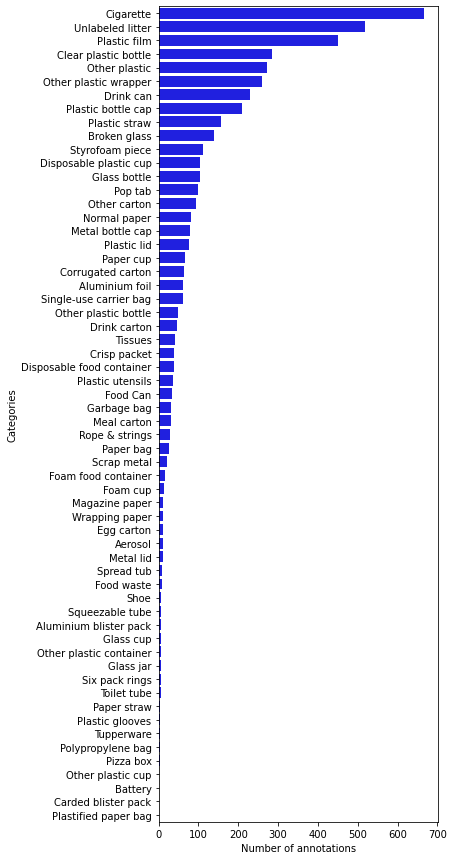

In [ ]:
# Count annotations
cat_histogram = np.zeros(nr_cats,dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")

# fig = plot_1.get_figure()
# fig.savefig("output.png")

In [ ]:
meta_df.describe().T

,count,mean,std,min,25%,50%,75%,max
img_id,4784.0,756.936037,445.884396,0.000000,354.75,743.00,1154.000,1499.0
img_width,4784.0,2794.278428,714.851079,842.000000,2448.00,2448.00,3264.000,6000.0
img_height,4784.0,3234.358278,837.244672,474.000000,2448.00,3264.00,4000.000,5312.0
cat_id,4784.0,34.079013,20.081707,0.000000,12.00,36.00,57.000,59.0
ann_id,4784.0,2391.949833,1381.264283,1.000000,1195.75,2392.50,3588.250,4783.0
x,4784.0,1232.285117,703.739763,-1.000000,741.60,1150.00,1612.000,5573.0
y,4784.0,1485.067894,826.005410,-1.316667,892.75,1414.00,1961.250,5208.0
width,4784.0,331.434419,440.431739,10.000000,68.00,179.50,405.250,3758.0
height,4784.0,320.246833,442.046602,4.000000,62.00,159.00,387.000,3995.0
area,4784.0,150407.154132,485084.750277,55.500000,2142.00,14244.75,75333.125,7328035.5


In [ ]:
dtypes=pd.DataFrame(meta_df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=meta_df.nunique()
dtypes["Null Values"]=meta_df.isnull().sum()
dtypes["% null Values"]=meta_df.isnull().sum()/len(meta_df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
img_id,int64,1500,0,0.000000
img_width,int64,44,0,0.000000
img_height,int64,46,0,0.000000
img_file,object,1500,0,0.000000
cat_id,int64,59,0,0.000000
cat_name,object,59,0,0.000000
supercategory,object,28,0,0.000000
ann_id,int64,4782,0,0.000000
x,float64,2414,0,0.000000
y,float64,2630,0,0.000000


Text(0, 0.5, 'Count')

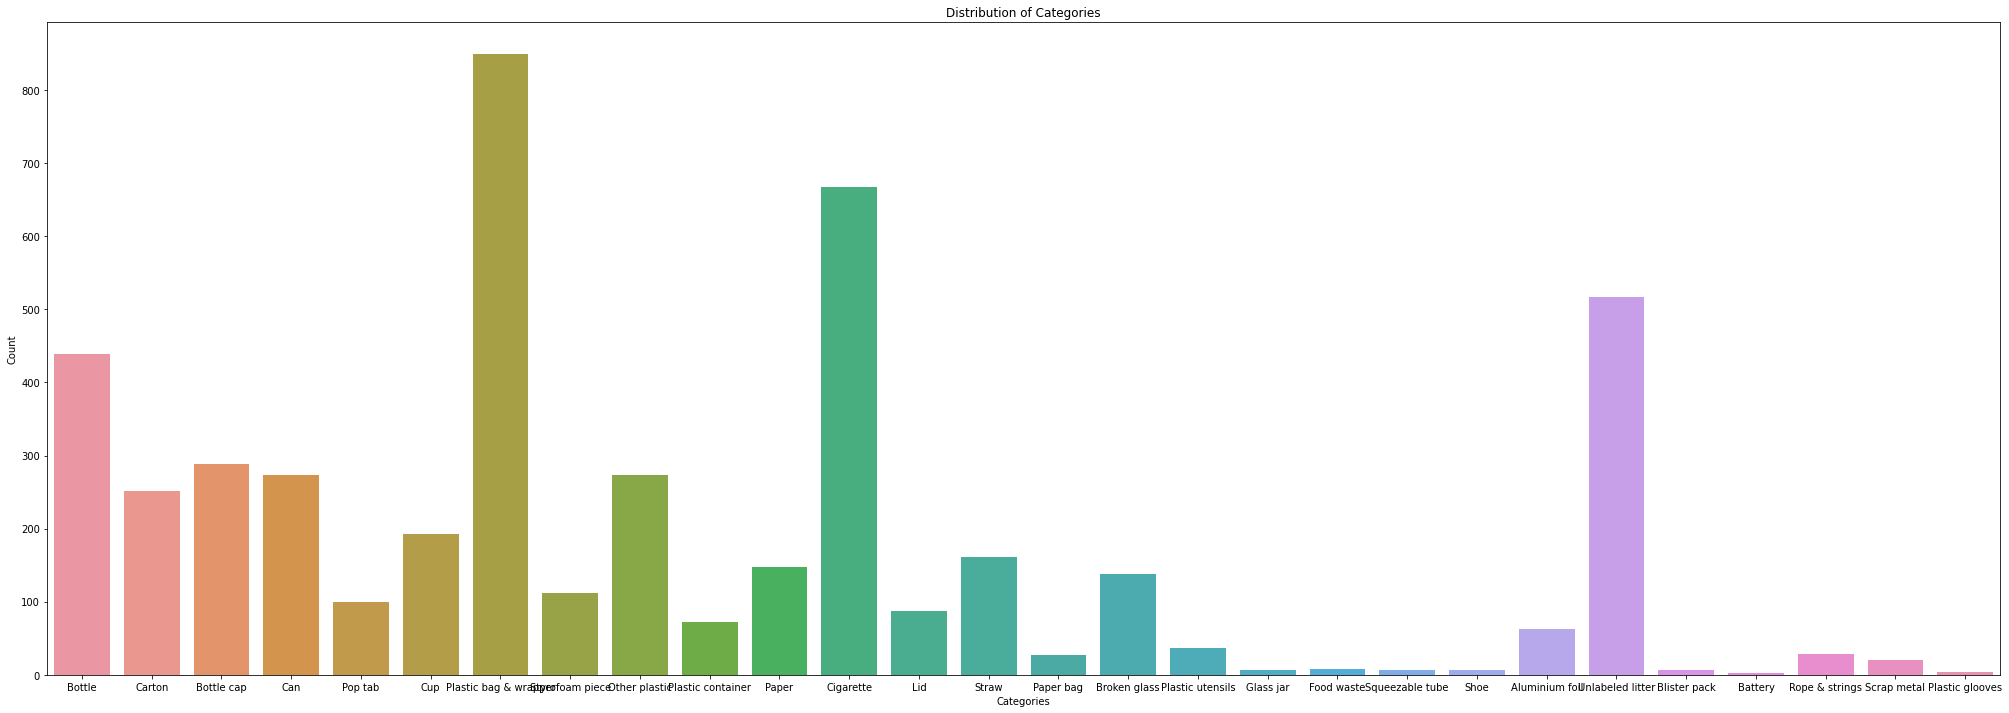

In [ ]:
plt.figure(figsize=(35,12))

d=sns.countplot(data = meta_df, x = 'supercategory')

plt.title('Distribution of Categories')
plt.xlabel('Super Categories')
plt.ylabel('Count')

In [ ]:
def load_data():
    # Import IMAGENET dataset
    dataset = 

    # Data preparation
    raw_X = dataset['data']
    raw_Y = dataset['target']
    return raw_X, raw_Y

raw_X, raw_Y = load_data()

In [ ]:
def clean_data(raw_X, raw_Y):
    # TODO: clean and QA raw_X and raw_Y
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    # X transformation
    cleaned_X = raw_X / 127.5 - 1.0

    # Y transformation
    cleaned_Y = keras.utils.to_categorical(raw_Y)
    
    return cleaned_X, cleaned_Y

cleaned_X, cleaned_Y = clean_data(raw_X, raw_Y)

In [ ]:
### Data Split

In [ ]:
# Upload TACO dataset









In [ ]:
### Visulaizing the dataset

In [ ]:
def viz_data(X_train):


viz_data(X_train)

In [ ]:
### Model
#Classifiers.models_names()
from classification_models.keras import Classifiers

resnext101, preprocess_input = Classifiers.get('resnext101')
#model = resnext101(include_top = False, input_shape=(224, 224, 3), weights='imagenet')


In [ ]:
# build the model
def build_model():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))
    
    return model

# compile the model
def compile_model(model):
    
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# train the model
def train_model(model, X_train, Y_train, X_val, Y_val):
       
    history = model.fit(X_train, Y_train,
          batch_size=128, epochs=21,
          verbose=2,
          validation_data=(X_val, Y_val))
    
    return model, history

# Evaluate the model
def eval_model(model, X_test, Y_test):
   
    test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=2)

    print('Test Accuracy: %.2f' % (test_accuracy*100))
    print('Test loss: %.2f' % (test_loss))

    return test_loss, test_accuracy

In [ ]:
model.summary()

In [ ]:
## Checking the Accuracy for our Model
model = build_model()
model = compile_model(model)
model, history = train_model(model, X_train, Y_train, X_val, Y_val)
test_loss, test_accuracy = eval_model(model, X_test, Y_test)